In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn as sk
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
def threshold(vec):
    vec2 = np.copy(vec)
    vec2[vec2 <= 0] = -1
    vec2[vec2> 0] = 1
    return vec2

def equiv(W, x):
    return (W[0, 0] * x + W[0, 2]) / (-W[0, 1])

Single Layer

In [3]:

# Create T and X
X_tmp = np.ones((4, 100))
# Separable
X_tmp[0, 0:50] = np.random.normal(1, .6, 50)
X_tmp[0, 50:100] = np.random.normal(3, .6, 50)
X_tmp[1, 0:50] = np.random.normal(2, .4, 50)
X_tmp[1, 50:100] = np.random.normal(2, .4, 50)
X_tmp[3, 50:100] = -1
np.random.shuffle(X_tmp.T)

X = X_tmp[:3, :]
T = X_tmp[3, :]

# Create W
W = np.random.normal(size=(1, 3))
W_per = np.copy(W)
W_it = np.copy(W)
W_per_it = np.copy(W)

eta = .001

err_delta = []
err_per = []
err_delta_it = []
err_per_it = []

In [4]:

for i in range(1000):

    # Delta batch
    err_delta.append(sum(abs(threshold(W.dot(X)) - T).T/2))
    delta_W = -eta * np.dot((W.dot(X) - T), X.T)
    W = W + delta_W

    # Perceptron batch
    err_per.append(sum(abs(threshold(W_per.dot(X)) - T).T/2))
    delta_W_per = -eta * np.dot((threshold(W_per.dot(X)) - T)/2, X.T)
    W_per = W_per + delta_W_per


    # Delta iterative
    err_delta_it.append(sum(abs(threshold(W_it.dot(X)) - T).T/2))
    for X_column in X_tmp.T:
        delta_W_del_it = -eta * (np.dot(W_it,X_column[:3])-X_column[3])*X_column[:3].T
        W_it = W_it + delta_W_del_it

    # Percep iterative
    err_per_it.append(sum(abs(threshold(W_per_it.dot(X)) - T).T / 2))
    for X_column in X_tmp.T:
        delta_W_per_it = -eta * (threshold([np.dot(W_per_it, X_column[:3])]) - X_column[3]) * X_column[:3].T
        W_per_it = W_per_it + delta_W_per_it


xs = np.linspace(min(X[0]), max(X[0]), 1000)
ys = [equiv(W, x) for x in xs]
ys_per = [equiv(W_per, x) for x in xs]
ys_it = [equiv(W_it, x) for x in xs]
ys_per_it = [equiv(W_per_it, x) for x in xs]


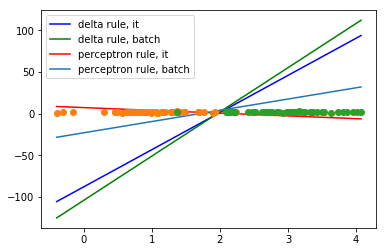

In [7]:
plt.plot(xs, ys,'b',label="delta rule, it")
plt.plot(xs,ys_it,'g',label="delta rule, batch")
plt.plot(xs, ys_per,'r',label="perceptron rule, it")
plt.plot(xs,ys_per_it,label="perceptron rule, batch")
plt.plot(X_tmp[:, X_tmp[3, :] == 1][0, :], X_tmp[:, X_tmp[3, :] == 1][1, :], 'o')
plt.plot(X_tmp[:, X_tmp[3, :] == -1][0, :], X_tmp[:, X_tmp[3, :] == -1][1, :], 'o')
plt.legend()
plt.show()

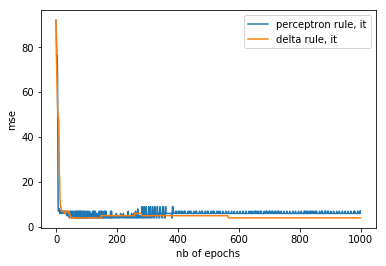

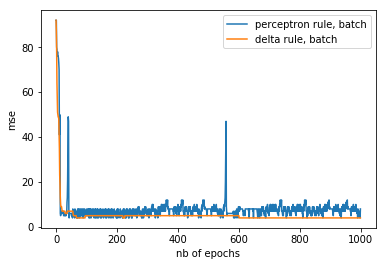

In [12]:
plt.plot(range(1000),err_per_it,label="perceptron rule, it")
plt.plot(range(1000),err_delta,label="delta rule, it")
plt.ylabel("mse")
plt.xlabel("nb of epochs")
plt.legend()
plt.show()
plt.plot(range(1000),err_per,label="perceptron rule, batch")
plt.plot(range(1000),err_delta_it,label="delta rule, batch")
plt.ylabel("mse")
plt.xlabel("nb of epochs")
plt.legend()
plt.show()

Two layers

In [13]:
def phi(mat):
    return 2/(1+np.exp(-mat))-1

def phi_prime(mat):
    return ((1+phi(mat))*(1-phi(mat)))/2

In [14]:
X_tmp = np.ones((4, 200))
X_tmp[0, 0:50] = np.random.normal(0, .2, 50)
X_tmp[1, 0:50] = np.random.normal(0, .2, 50)
X_tmp[0, 50:100] = np.random.normal(1, .2, 50)
X_tmp[1, 50:100] = np.random.normal(1, .2, 50)
X_tmp[3, 0:100] = -1

X_tmp[0, 100:150] = np.random.normal(1, .2, 50)
X_tmp[1, 100:150] = np.random.normal(0, .2, 50)
X_tmp[0, 150:200] = np.random.normal(0, .2, 50)
X_tmp[1, 150:200] = np.random.normal(1, .2, 50)
X_tmp[3, 100:200] = 1

X_eval_tmp = np.ones((4, 200))
X_eval_tmp[0, 0:50] = np.random.normal(0, .2, 50)
X_eval_tmp[1, 0:50] = np.random.normal(0, .2, 50)
X_eval_tmp[0, 50:100] = np.random.normal(1, .2, 50)
X_eval_tmp[1, 50:100] = np.random.normal(1, .2, 50)
X_eval_tmp[3, 0:100] = -1

X_eval_tmp[0, 100:150] = np.random.normal(1, .2, 50)
X_eval_tmp[1, 100:150] = np.random.normal(0, .2, 50)
X_eval_tmp[0, 150:200] = np.random.normal(0, .2, 50)
X_eval_tmp[1, 150:200] = np.random.normal(1, .2, 50)
X_eval_tmp[3, 100:200] = 1

np.random.shuffle(X_tmp.T)

X = X_tmp[:3]
T = X_tmp[3]

X_eval = X_eval_tmp[:3]
T_eval = X_eval_tmp[3]

number_hidden = 4
eta = .01
nb_iter = 200

In [15]:
W = np.random.normal(size=(number_hidden, 3))
V = np.random.normal(size=(1,number_hidden))

mse = []
errors_misclassified = []
error_new_data = []

In [16]:
for i in range(nb_iter):
    H_star = np.dot(W,X)
    H = phi(H_star)
    O_star = np.dot(V,H)
    O = phi(O_star)
    dO = np.multiply((O-T),phi_prime(O_star))
    dH = np.multiply(np.dot(V.T,dO), phi_prime(H_star))
    delta_W = -eta * np.dot(dH,X.T)
    delta_V = -eta * np.dot(dO,H.T)
    W = W + delta_W
    V = V + delta_V
    tmp = threshold(O)
    diff = T - tmp
    errors_misclassified.append(np.count_nonzero(diff))
    squared = np.square(diff)
    mse.append(np.mean(squared))

    H_star_eval = np.dot(W, X_eval)
    H_eval = phi(H_star_eval)
    O_star_eval = np.dot(V, H_eval)
    O_eval = phi(O_star_eval)

    tmp_eval = threshold(O_eval)
    diff_eval = T_eval - tmp_eval
    error_new_data.append(np.count_nonzero(diff_eval))

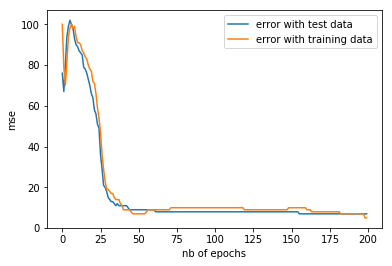

In [18]:
plt.plot(range(len(error_new_data)),error_new_data,label="error with test data")
plt.plot(range(len(errors_misclassified)),errors_misclassified,label="error with training data")
plt.legend()
plt.ylabel("mse")
plt.xlabel("nb of epochs")
plt.show()

Encoder

In [23]:
X_tmp = np.ones((8,8))
X_tmp -= 2*np.eye(8,8)
#
#
np.random.shuffle(X_tmp.T)
#
X = X_tmp
T = X_tmp

number_hidden = 3
eta = .049
nb_iter = 30000

W = np.random.normal(size=(number_hidden, len(X)))
V = np.random.normal(size=(len(T),number_hidden))
#


errors_misclassified = []
error_new_data = []
diff = T

[[-1.04312845  1.46136115 -0.68464188  0.3434819   3.77450585  0.03605907
  -0.10273714 -3.96573195]
 [-0.32987456  0.02940544 -0.00825768  1.43414605  1.16465912  0.6773783
   4.07517045  1.43940082]
 [ 1.15201933  0.93556272 -2.33532303 -3.63103512 -0.07600274  4.16676165
   0.31775943  0.08271132]]
[[ -1.24954460e+01   1.38629347e+01   1.16378303e+01]
 [  1.40170015e+01   1.44893508e+01   8.91313284e+00]
 [ -7.69381946e+00   1.46056854e+01  -1.39495265e+01]
 [  6.60738615e+00   1.61925672e+01  -1.64199213e+01]
 [  1.68712043e+01   1.58891290e+01  -5.37498806e+00]
 [  1.36419010e+00   1.41138977e+01   1.69874361e+01]
 [ -1.15144533e-02   2.58014746e+00   2.86473985e-02]
 [ -1.71839946e+01   1.46949887e+01  -2.13935642e+00]]


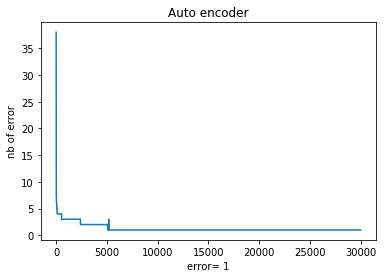

In [24]:
for i in range(nb_iter):
    H_star = np.dot(W,X)
    H = phi(H_star)
    O_star = np.dot(V,H)
    O = phi(O_star)
    dO = np.multiply((O-T),phi_prime(O_star))
    dH = np.multiply(np.dot(V.T,dO), phi_prime(H_star))
    delta_W = -eta * np.dot(dH,X.T)
    delta_V = -eta * np.dot(dO,H.T)
    W = W + delta_W
    V = V + delta_V
    tmp = threshold(O)
    diff = T - tmp
    errors_misclassified.append(np.count_nonzero(diff))
    squared = np.square(diff)

print(W)
print(V)

plt.plot(range(nb_iter), errors_misclassified,label="nb of missclassified points")
plt.xlabel("error= " + str(np.count_nonzero(diff)))
plt.ylabel("nb of error")
plt.title("Auto encoder")
plt.show()

GAUSS

In [25]:
X_tmp = np.ones((4,400))
k = 0
for i in np.linspace(-.5,.5,20):
    for j in np.linspace(-.5, .5, 20):
        X_tmp[0,k] = i
        X_tmp[1,k] = j
        k += 1


X_tmp[3] = np.exp(-(np.square(X_tmp[0])+np.square(X_tmp[1]))/10)
np.random.shuffle(X_tmp.T)

In [26]:
X = X_tmp[:3]
T = X_tmp[3]

number_hidden = 4
eta = .003
nb_iter = 1000

W = np.random.normal(0,.4,size=(number_hidden, len(X)))
V = np.random.normal(0,.4,size=(1,number_hidden))


errors_misclassified = []
mse = []
error_new_data = []

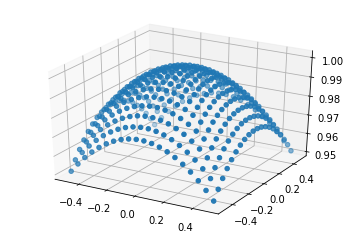

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0], X[1], T)

plt.show()

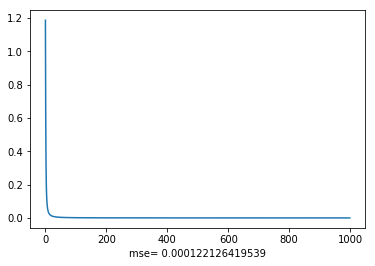

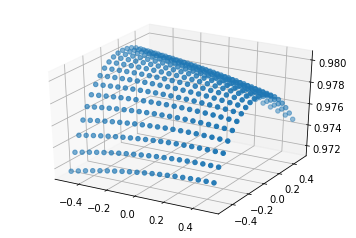

In [177]:
O = T
for i in range(nb_iter):
    H_star = np.dot(W,X)
    H = phi(H_star)
    O_star = np.dot(V,H)
    O = phi(O_star)
    dO = np.multiply((O-T),phi_prime(O_star))
    dH = np.multiply(np.dot(V.T,dO), phi_prime(H_star))
    delta_W = -eta * np.dot(dH,X.T)
    delta_V = -eta * np.dot(dO,H.T)
    W = W + delta_W
    V = V + delta_V
    
    diff = T - O
    mse.append(np.mean(np.square(diff)))
    

plt.plot(range(len(mse)), mse)
plt.xlabel("mse= "+str(mse[-1]))
plt.show()

W = np.random.normal(size=(number_hidden, len(X)))
V = np.random.normal(size=(1,number_hidden))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0], X[1], O)

plt.show()

errors_misclassified = []
mse = []
error_new_data = []

In [27]:
n_errors = []
for n in range(1,25):    
    X = X_tmp[:3]
    T = X_tmp[3]

    number_hidden = 4
    eta = .003
    nb_iter = 1000

    W = np.random.normal(0,.4,size=(number_hidden, len(X)))
    V = np.random.normal(0,.4,size=(1,number_hidden))


    errors_misclassified = []
    mse = []
    error_new_data = []

    O = T
    error = 0
    for i in range(nb_iter):
        H_star = np.dot(W,X)
        H = phi(H_star)
        O_star = np.dot(V,H)
        O_whole_data = phi(O_star)
        H_star = np.dot(W,X[:,:n])
        H = phi(H_star)
        O_star = np.dot(V,H)
        O = phi(O_star)
        dO = np.multiply((O-T[:n]),phi_prime(O_star))
        dH = np.multiply(np.dot(V.T,dO), phi_prime(H_star))
        delta_W = -eta * np.dot(dH,X[:,:n].T)
        delta_V = -eta * np.dot(dO,H.T)
        W = W + delta_W

        diff = T - O_whole_data
        error = (np.mean(np.square(diff)))
    n_errors.append(error)

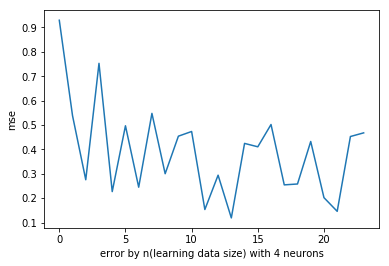

In [32]:
plt.plot(range(len(n_errors)), n_errors)
plt.ylabel("mse")
plt.xlabel("error by n(learning data size) with 4 neurons")
plt.show()

In [33]:
n_errors = []
for n in range(1,25):    
    X = X_tmp[:3]
    T = X_tmp[3]

    number_hidden = 25
    eta = .003
    nb_iter = 1000

    W = np.random.normal(0,.4,size=(number_hidden, len(X)))
    V = np.random.normal(0,.4,size=(1,number_hidden))


    errors_misclassified = []
    mse = []
    error_new_data = []

    O = T
    error = 0
    for i in range(nb_iter):
        H_star = np.dot(W,X)
        H = phi(H_star)
        O_star = np.dot(V,H)
        O_whole_data = phi(O_star)
        H_star = np.dot(W,X[:,:n])
        H = phi(H_star)
        O_star = np.dot(V,H)
        O = phi(O_star)
        dO = np.multiply((O-T[:n]),phi_prime(O_star))
        dH = np.multiply(np.dot(V.T,dO), phi_prime(H_star))
        delta_W = -eta * np.dot(dH,X[:,:n].T)
        delta_V = -eta * np.dot(dO,H.T)
        W = W + delta_W

        diff = T - O_whole_data
        error = (np.mean(np.square(diff)))
    n_errors.append(error)

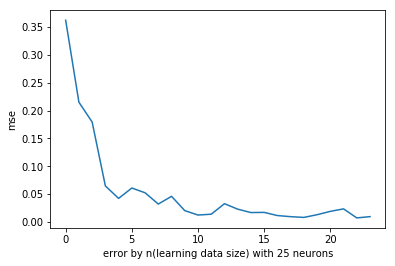

In [34]:
plt.plot(range(len(n_errors)), n_errors)
plt.ylabel("mse")
plt.xlabel("error by n(learning data size) with 25 neurons")
plt.show()

In [35]:
table_previous = {0:1.5}
def f(x,table_previous):
    if (x < 0):
        return 0
    if x in table_previous:
        return table_previous[x]
    previous = f(x-1,table_previous)
    previous26 = f(x-26,table_previous)
    val = previous + (.2*previous26)/(1+previous26**10) - previous*.1
    table_previous[x] = val
    return val

In [36]:
x = range(300,1500)
y = []
for i in x:
    y.append(f(i,table_previous))

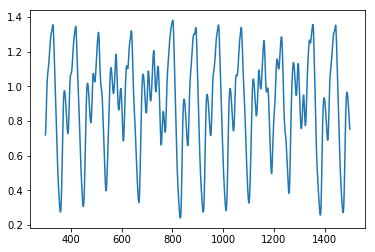

In [37]:
plt.plot(x,y)
plt.show()

In [38]:
X_tmp = np.ones((7,1200))
k = 0
for i in range(300,1500):
    X_tmp[0,k] = f(i,table_previous)
    X_tmp[1,k] = f(i-5,table_previous)    
    X_tmp[2,k] = f(i-10,table_previous)    
    X_tmp[3,k] = f(i-15,table_previous)    
    X_tmp[4,k] = f(i-20,table_previous)
    X_tmp[6,k] = f(i+5,table_previous)   
    k = k+1
np.random.shuffle(X_tmp.T)
X = X_tmp[:6].T
T = X_tmp[6]
X_learn_eval = X[:1000]
T_learn_eval = T[:1000]
X_test = X[1000:]
T_test = T[1000:]

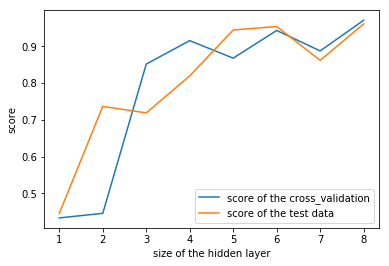

In [40]:
max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval,T_learn_eval)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval,T_learn_eval)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.legend()
plt.ylabel("score")
plt.xlabel("size of the hidden layer")
plt.show()

In [41]:
regressor.score(X_test,T_test)

0.89989258384907955

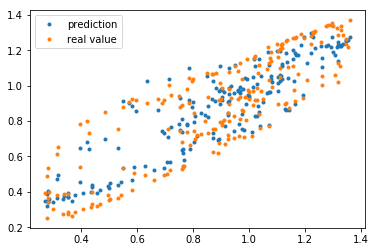

In [44]:
plt.plot(X_test.T[0],regressor.predict(X_test),'.',label="prediction")
plt.plot(X_test.T[0],T_test,'.',label="real value")
plt.legend()
plt.show()

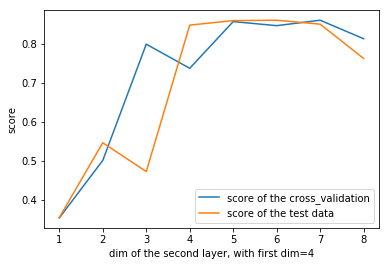

In [60]:

max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(4,hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval,T_learn_eval)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval,T_learn_eval)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.xlabel("dim of the second layer, with first dim=4")
plt.ylabel("score")
plt.legend()
plt.show()


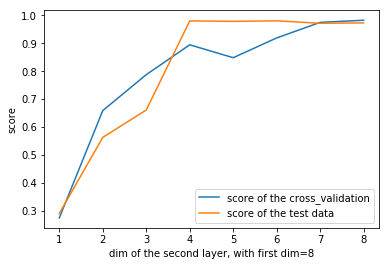

In [61]:
max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(8,hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval,T_learn_eval)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval,T_learn_eval)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.xlabel("dim of the second layer, with first dim=8")
plt.ylabel("score")
plt.legend()
plt.show()

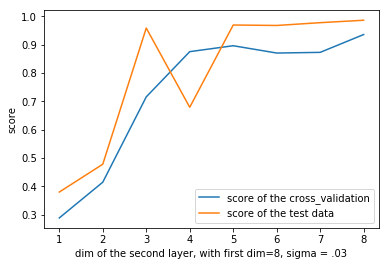

In [62]:

X_learn_eval_noise =  X_learn_eval + np.random.normal(0,.03,size=X_learn_eval.shape)
T_learn_eval_noise = T_learn_eval + np.random.normal(0,.03,size=T_learn_eval.shape)
max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(8,hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval_noise,T_learn_eval_noise)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval_noise,T_learn_eval_noise)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.xlabel("dim of the second layer, with first dim=8, sigma = .03")
plt.ylabel("score")
plt.legend()
plt.show()

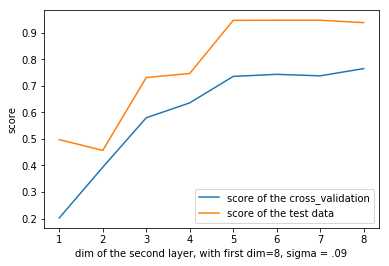

In [63]:
X_learn_eval_noise =  X_learn_eval + np.random.normal(0,.09,size=X_learn_eval.shape)
T_learn_eval_noise = T_learn_eval + np.random.normal(0,.09,size=T_learn_eval.shape)
max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(8,hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval_noise,T_learn_eval_noise)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval_noise,T_learn_eval_noise)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.xlabel("dim of the second layer, with first dim=8, sigma = .09")
plt.ylabel("score")
plt.legend()
plt.show()

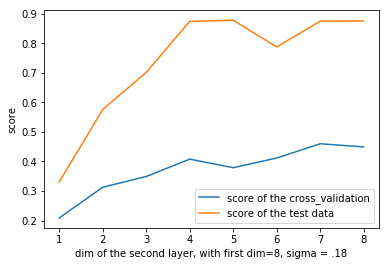

In [64]:
X_learn_eval_noise =  X_learn_eval + np.random.normal(0,.18,size=X_learn_eval.shape)
T_learn_eval_noise = T_learn_eval + np.random.normal(0,.18,size=T_learn_eval.shape)
max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(8,hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval_noise,T_learn_eval_noise)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval_noise,T_learn_eval_noise)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.xlabel("dim of the second layer, with first dim=8, sigma = .18")
plt.ylabel("score")
plt.legend()
plt.show()

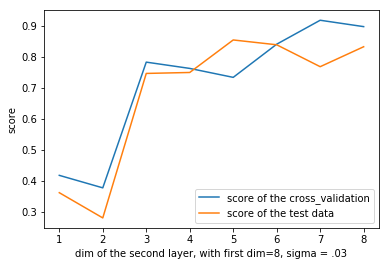

In [65]:
X_learn_eval_noise =  X_learn_eval + np.random.normal(0,.03,size=X_learn_eval.shape)
T_learn_eval_noise = T_learn_eval + np.random.normal(0,.03,size=T_learn_eval.shape)
max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(4,hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval_noise,T_learn_eval_noise)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval_noise,T_learn_eval_noise)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.xlabel("dim of the second layer, with first dim=8, sigma = .03")
plt.ylabel("score")
plt.legend()
plt.show()

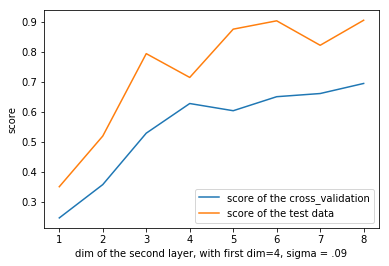

In [66]:
X_learn_eval_noise =  X_learn_eval + np.random.normal(0,.09,size=X_learn_eval.shape)
T_learn_eval_noise = T_learn_eval + np.random.normal(0,.09,size=T_learn_eval.shape)
max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(4,hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval_noise,T_learn_eval_noise)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval_noise,T_learn_eval_noise)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.xlabel("dim of the second layer, with first dim=4, sigma = .09")
plt.ylabel("score")
plt.legend()
plt.show()

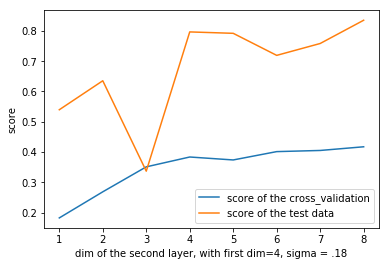

In [67]:
X_learn_eval_noise =  X_learn_eval + np.random.normal(0,.18,size=X_learn_eval.shape)
T_learn_eval_noise = T_learn_eval + np.random.normal(0,.18,size=T_learn_eval.shape)
max_iter=10000
scores = [0 for _ in range(8)]
tests = [0 for _ in range(8)]
nb_tries = 10
for _ in range(nb_tries):
    for hidden_layers_dim in range(1,9):
        regressor = MLPRegressor(activation='relu',solver='lbfgs',hidden_layer_sizes=(4,hidden_layers_dim), max_iter= max_iter,early_stopping=True)
        scores_eval = cross_val_score(regressor,X_learn_eval_noise,T_learn_eval_noise)
        scores[hidden_layers_dim-1] += (np.mean(scores_eval))/nb_tries
        regressor.fit(X_learn_eval_noise,T_learn_eval_noise)
        tests[hidden_layers_dim-1] += (regressor.score(X_test,T_test))/nb_tries
    
plt.plot(range(1,9), scores,label="score of the cross_validation")
plt.plot(range(1,9), tests,label="score of the test data")
plt.xlabel("dim of the second layer, with first dim=4, sigma = .18")
plt.ylabel("score")
plt.legend()
plt.show()